In [19]:

import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:

# reading training data
zf_test = zipfile.ZipFile('data/test.csv.zip')
df_test = pd.read_csv(zf_test.open('test.csv'), converters={'POLYLINE': lambda x: json.loads(x)[-1:]})
latlong_test = np.array([[p[0][1], p[0][0]] for p in df_test['POLYLINE'] if len(p)>0])

zf_train = zipfile.ZipFile('data/train.csv.zip')
df_train = pd.read_csv(zf_train.open('train.csv'), converters={'POLYLINE': lambda x: json.loads(x)[-1:]})
latlong_train = np.array([[p[0][1], p[0][0]] for p in df_train['POLYLINE'] if len(p)>0])


In [15]:
# cut off long distance trips
lat_low, lat_hgh = np.percentile(latlong_train[:,0], [2, 98])
lon_low, lon_hgh = np.percentile(latlong_train[:,1], [2, 98])

# create image
bins = 513
lat_bins = np.linspace(lat_low, lat_hgh, bins)
lon_bins = np.linspace(lon_low, lon_hgh, bins)
H2, _, _ = np.histogram2d(latlong_train[:,0], latlong_train[:,1], bins=(lat_bins, lon_bins))

In [41]:
prior = H2 + np.ones(shape=prior.shape)
prior = prior/np.sum(prior,dtype=np.float64)

lat_centroids = [(lat_bins[i]+lat_bins[i+1])/2.0 for i in xrange(len(lat_bins)-1)]
lon_centroids = [(lon_bins[i]+lon_bins[i+1])/2.0 for i in xrange(len(lon_bins)-1)]

In [71]:
coord_list = []
for i,lat in enumerate(lat_centroids):
    for j,lon in enumerate(lon_centroids):
#         print j+ i*(len(lat_centroids))
        coord_list.append((lat,lon))

262143

In [110]:
pred_list = []
for i in xrange(len(latlong_test)):
    gauss = multivariate_normal.pdf(coord_list, mean=[latlong_test[i][0],latlong_test[i][1]], cov=[0.000005, 0.000005])
    gauss_grid = np.reshape(np.array(gauss),(bins-1,bins-1))  
    
    post = np.multiply(prior,gauss_grid)
    pred = coord_list[post.argmax()]
    print pred
    pred_list.append(pred)

(41.148769078125, -8.585575804687501)
(41.164381265624996, -8.6007872109375008)
(41.165496421874998, -8.5719379921875003)
(41.141409046874998, -8.6133759609374998)
(41.146761796874998, -8.6199326015624997)
(41.171072203125, -8.6285873671874995)
(41.148769078125, -8.585575804687501)
(41.183561953125, -8.5805927578125001)
(41.125796859375001, -8.6055079921875013)
(41.196943828125001, -8.5853135390625006)
(41.165496421874998, -8.5887229921875008)
(41.150776359375001, -8.5989513515625013)
(41.160589734375002, -8.5845267421874993)
(41.236866421875, -8.6700253359375008)
(41.145646640625003, -8.6107533046875009)
(41.213002078125001, -8.6535026015625007)
(41.154790921874998, -8.6306854921874994)
(41.154790921874998, -8.6306854921874994)
(41.163043078125, -8.5918701796875006)
(41.161258828125, -8.6406515859375013)
(41.148769078125, -8.585575804687501)
(41.133602953124999, -8.6128514296875007)
(41.154790921874998, -8.6306854921874994)
(41.148769078125, -8.585575804687501)
(41.148769078125, -8.64

In [112]:
gps = zip(*pred_list)
df_sub = pd.DataFrame()
df_sub["TRIP_ID"] = df_test["TRIP_ID"]
df_sub["LATITUDE"] = gps[0]
df_sub["LONGITUDE"] = gps[1]
df_sub.to_csv("data/last_location_gaussian_submission.csv", index=False)

In [100]:
print latlong_test[0][0],latlong_test[0][1]
# i,j = np.unravel_index(post.argmax(), post.shape)
# print i, j
# print post[i,j]
coord_list[post.argmax()]

41.146623 -8.584884


(41.148769078125, -8.585575804687501)

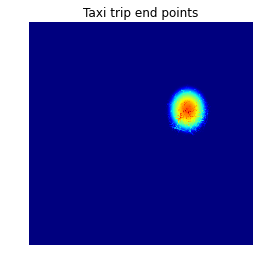

In [111]:
img = np.log(100000000*post[::-1, :] + 1)

plt.figure()
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')
plt.title('Taxi trip end points')
# plt.savefig("taxi_trip_end_points.png")

In [11]:
print lat_low
lat_bins

41.123232


array([ 41.123232  ,  41.12345503,  41.12367806,  41.12390109,
        41.12412413,  41.12434716,  41.12457019,  41.12479322,
        41.12501625,  41.12523928,  41.12546231,  41.12568534,
        41.12590838,  41.12613141,  41.12635444,  41.12657747,
        41.1268005 ,  41.12702353,  41.12724656,  41.12746959,
        41.12769263,  41.12791566,  41.12813869,  41.12836172,
        41.12858475,  41.12880778,  41.12903081,  41.12925384,
        41.12947688,  41.12969991,  41.12992294,  41.13014597,
        41.130369  ,  41.13059203,  41.13081506,  41.13103809,
        41.13126113,  41.13148416,  41.13170719,  41.13193022,
        41.13215325,  41.13237628,  41.13259931,  41.13282234,
        41.13304538,  41.13326841,  41.13349144,  41.13371447,
        41.1339375 ,  41.13416053,  41.13438356,  41.13460659,
        41.13482963,  41.13505266,  41.13527569,  41.13549872,
        41.13572175,  41.13594478,  41.13616781,  41.13639084,
        41.13661388,  41.13683691,  41.13705994,  41.13

In [26]:
np.sum(prior)

0.99999999999999967